In [61]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)
import scipy.special
from scipy import stats
import numpy as np

# Load the consumption data

In [2]:
consumo = pd.read_csv("../../data/analisis consumo/preprocesing/Simples_Carga_de_Energia_Dia_Hora_data.csv",sep = ";")
consumo = consumo[['Data Escala de Tempo 1 CDH Simp 4','Selecione Tipo de CDH Simp 4']]
consumo = consumo.rename(columns={
    'Data Escala de Tempo 1 CDH Simp 4': 'fecha',
    'Selecione Tipo de CDH Simp 4': 'mwh'
    
})

In [3]:
consumo.head()

,fecha,mwh
0,01/01/2008 0:00:00,7082
1,01/01/2008 1:00:00,6780
2,01/01/2008 2:00:00,6613
3,01/01/2008 3:00:00,6468
4,01/01/2008 4:00:00,6293


In [4]:
consumo["fecha"] = pd.to_datetime(consumo["fecha"])
consumo["ano"]= consumo["fecha"].dt.year
consumo["mes"]= consumo["fecha"].dt.month
consumo["dia"]= consumo["fecha"].dt.day
consumo["hora"]= consumo["fecha"].dt.hour


13133.36 lo que da el v6

In [5]:
año = consumo.groupby('ano')

In [6]:
año.sum()

,mwh,mes,dia,hora
ano,,,,
2008,65651638,57206,138389,101016
2009,65717335,57158,137694,100740
2010,71307983,57158,137695,100740
2011,71603498,57158,137696,100740
2012,76668660,57206,138387,101016
2013,81393689,57158,137692,100740
2014,83945177,57158,137693,100740
2015,85850653,57158,137694,100740
2016,87685362,57206,138392,101016


In [7]:
añotabla = pd.DataFrame(
    {
        "Gastototal": año["mwh"].sum(),
        "SD" : año["mwh"].std()
        
    }
)


In [8]:
añotabla

,Gastototal,SD
ano,,
2008,65651638,861.388858
2009,65717335,936.862493
2010,71307983,933.127866
2011,71603498,957.278410
2012,76668660,1015.349785
2013,81393689,1051.308769
2014,83945177,1276.211336
2015,85850653,1064.497810
2016,87685362,1034.604102


In [9]:
anhootabla = añotabla.copy()
anhootabla['Gastototal'] = anhootabla['Gastototal']/1000

In [10]:
plt.rcParams.update({'font.size': 14})

# Energy Consumption in Fortaleza 2008 to 2018 MWH

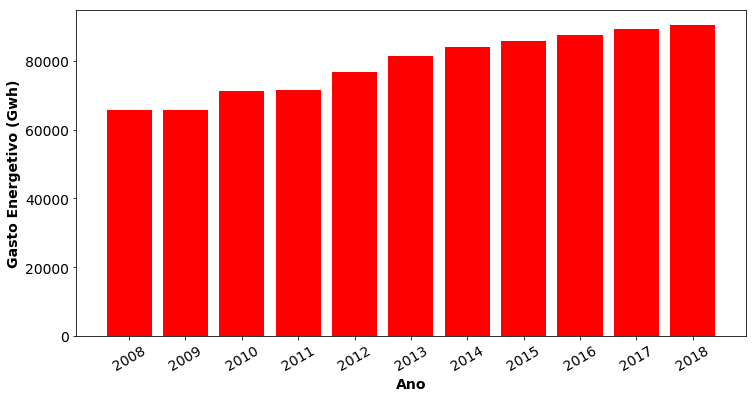

In [11]:
fig, y = plt.subplots( figsize=(12,6))
t = np.arange(11)
y.bar(t,anhootabla['Gastototal'], color = "red",label="Capacity factor")
y.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
y.set_xticklabels(añotabla.index, rotation=30)
y.set_xlabel('Ano',fontweight='bold')
y.set_ylabel('Gasto Energetivo (Gwh)',fontweight='bold')
y.plot(np.nan, '-r', label = 'Inverter')



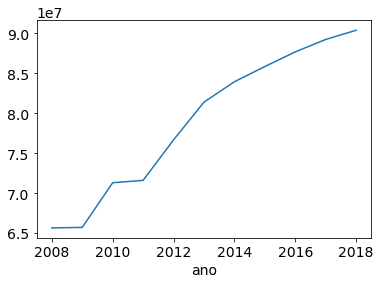

In [12]:
añotabla['Gastototal'].plot()

In [13]:
tabla['Mean'].mean()

NameError: name 'tabla' is not defined

In [258]:
aero = 13133.36*100

In [259]:
aero/79041745.0

0.01661572628488908

Decido hacer 100 aerogeneradores que daran un total de 1313336 MWh a lo largo de todo el anho. lo que supondria un 1% de la matriz energetica en el nordeste, ahora voy a calcular cuanta energia se desperciciaria

#  Grouping by average of consumption for months, days and hours

Primero deciciendo que van a ser 100 aerogeneradores y viendo que en 10 anhos seria un total de 0.0166 del total, tendre que hacer ese calculo para el consumo

In [15]:
consumo['porciento'] = consumo['mwh']*0.01661572628488908

In [16]:
agrcon = consumo.groupby(['mes','dia','hora'])

In [17]:
agrcon.mean()

mwh     ano   porciento
mes dia hora                                  
1   1   0      8362.090909  2013.0  138.942214
        1      8033.363636  2013.0  133.480171
        2      7928.090909  2013.0  131.730989
        3      7858.000000  2013.0  130.566377
        4      7740.000000  2013.0  128.605721
        5      7619.909091  2013.0  126.610324
        6      6927.727273  2013.0  115.109220
        7      6623.909091  2013.0  110.061060
        8      6676.363636  2013.0  110.932631
        9      6800.363636  2013.0  112.992981
        10     6900.272727  2013.0  114.653043
        11     6952.181818  2013.0  115.515550
        12     6967.727273  2013.0  115.773849
        13     6942.727273  2013.0  115.358456
        14     6928.454545  2013.0  115.121304
        15     6951.818182  2013.0  115.509508
        16     6928.090909  2013.0  115.115262
        17     6882.000000  2013.0  114.349428
        18     7065.000000  2013.0  117.390106
        19     8603.909091  2013.0  142.960198
        20     9066.090909  2013.0  150.639685
        21     8981.090909  2013.0  149.227348
        22     8939.272727  2013.0  148.532509
        23     8701.818182  2013.0  144.587029
    2   0      9384.545455  2013.0  155.931039
        1      8935.909091  2013.0  148.476620
        2      8639.454545  2013.0  143.550812
        3      8455.363636  2013.0  140.492008
        4      8349.454545  2013.0  138.732251
        5      8277.090909  2013.0  137.529877
...                    ...     ...         ...
12  30  18     8666.363636  2013.0  143.997926
        19     9723.727273  2013.0  161.566791
        20     9973.000000  2013.0  165.708638
        21     9829.909091  2013.0  163.331079
        22    10090.181818  2013.0  167.655699
        23     9889.818182  2013.0  164.326512
    31  0      9484.636364  2013.0  157.594122
        1      8905.400000  2012.5  147.969689
        2      8588.400000  2012.5  142.702504
        3      8383.300000  2012.5  139.294618
        4      8246.600000  2012.5  137.023248
        5      8155.700000  2012.5  135.512879
        6      7539.800000  2012.5  125.279253
        7      7385.900000  2012.5  122.722093
        8      7802.000000  2012.5  129.635896
        9      8282.200000  2012.5  137.614768
        10     8518.100000  2012.5  141.534418
        11     8598.700000  2012.5  142.873646
        12     8527.700000  2012.5  141.693929
        13     8396.800000  2012.5  139.518930
        14     8409.300000  2012.5  139.726627
        15     8427.500000  2012.5  140.029033
        16     8321.300000  2012.5  138.264443
        17     8112.600000  2012.5  134.796741
        18     8017.300000  2012.5  133.213262
        19     9307.900000  2012.5  154.657519
        20     9694.900000  2012.5  161.087805
        21     9488.200000  2012.5  157.653334
        22     9387.300000  2012.5  155.976807
        23     8917.200000  2012.5  148.165754

[8784 rows x 3 columns]

In [18]:
agrcontabla = pd.DataFrame(
    {
        "Gastomedio": agrcon["porciento"].mean()
        
        
    }
)


In [19]:
agrcontabla

Gastomedio
mes dia hora            
1   1   0     138.942214
        1     133.480171
        2     131.730989
        3     130.566377
        4     128.605721
        5     126.610324
        6     115.109220
        7     110.061060
        8     110.932631
        9     112.992981
        10    114.653043
        11    115.515550
        12    115.773849
        13    115.358456
        14    115.121304
        15    115.509508
        16    115.115262
        17    114.349428
        18    117.390106
        19    142.960198
        20    150.639685
        21    149.227348
        22    148.532509
        23    144.587029
    2   0     155.931039
        1     148.476620
        2     143.550812
        3     140.492008
        4     138.732251
        5     137.529877
...                  ...
12  30  18    143.997926
        19    161.566791
        20    165.708638
        21    163.331079
        22    167.655699
        23    164.326512
    31  0     157.594122
        1     147.969689
        2     142.702504
        3     139.294618
        4     137.023248
        5     135.512879
        6     125.279253
        7     122.722093
        8     129.635896
        9     137.614768
        10    141.534418
        11    142.873646
        12    141.693929
        13    139.518930
        14    139.726627
        15    140.029033
        16    138.264443
        17    134.796741
        18    133.213262
        19    154.657519
        20    161.087805
        21    157.653334
        22    155.976807
        23    148.165754

[8784 rows x 1 columns]

In [20]:
@''

SyntaxError: invalid syntax (<ipython-input-20-226aae8a95f6>, line 1)

In [21]:
agrcontablares = agrcontabla.reset_index()

# Loading wind data

In [22]:
df = pd.read_csv("../../data/Vientodef.csv" , usecols =["Data","Direcao","Velocidade"])
df["Data"] = pd.to_datetime(df["Data"])
df["Ano"]= df["Data"].dt.year
df["Mes"]= df["Data"].dt.month
df["dia"]= df["Data"].dt.day
df["hour"]= df["Data"].dt.hour

df.head()

,Data,Direcao,Velocidade,Ano,Mes,dia,hour
0,2008-01-01 00:00:00,100,4.112,2008,1,1,0
1,2008-01-01 01:00:00,110,5.140,2008,1,1,1
2,2008-01-01 02:00:00,110,5.654,2008,1,1,2
3,2008-01-01 03:00:00,100,4.112,2008,1,1,3
4,2008-01-01 04:00:00,100,5.140,2008,1,1,4


In [23]:
grouped_Ano = df.groupby("Ano")
import scipy.special
from scipy import stats
Massaar10 = 1.225-(0.000194*10)
Massaar10

1.22306

In [24]:
tabla = pd.DataFrame(
    {
        "Mean": grouped_Ano["Velocidade"].mean(),
        "SD" : grouped_Ano["Velocidade"].std(),
        "k (-)": grouped_Ano["Velocidade"].apply (lambda x: stats.weibull_min.fit(x, loc=0)[0]),
        "C (m/s)": grouped_Ano["Velocidade"].apply (lambda x: stats.weibull_min.fit(x, loc=0)[2]),
        "WPD (W/m$^2$)": grouped_Ano["Velocidade"].apply (lambda x: 0.5*Massaar10*(((np.mean(x)*(1/scipy.special.gamma(1 + (1/((np.std(x)/np.mean(x))**(-1.086)))))))**3)*scipy.special.gamma(1 + (3/((np.std(x)/np.mean(x))**(-1.086))))),
        "RE": grouped_Ano["Velocidade"].apply (lambda x: ((np.absolute((0.5*Massaar10*(((np.mean(x)*(1/scipy.special.gamma(1 + (1/((np.std(x)/np.mean(x))**(-1.086)))))))**3)*scipy.special.gamma(1 + (3/((np.std(x)/np.mean(x))**(-1.086)))))-(0.5*Massaar10*np.mean(x**3)))/(np.absolute(0.5*Massaar10*np.mean(x**3)))*100)))

    }
)


resultados = pd.DataFrame(tabla.mean(), columns=["Total_Overage"]).T
Tabla_final = pd.concat([
    tabla,
    resultados
], axis=0)
Tabla_final

,Mean,SD,k (-),C (m/s),WPD (W/m$^2$),RE
2008,4.261858,2.096648,2.167607,4.835687,84.025950,0.155654
2009,4.002830,2.021863,2.102282,4.540380,71.466852,0.061924
2010,4.225459,1.934337,2.107795,4.371190,76.633446,0.607161
2011,4.751321,2.167609,2.490376,5.673173,108.628419,0.126428
2012,5.690804,2.260142,2.817135,6.568907,167.574876,0.119856
2013,5.678615,2.337979,2.668379,6.474233,170.845308,0.117966
2014,5.593266,2.401472,2.408382,6.078538,168.554256,0.358437
2015,5.586227,2.387565,2.450003,6.139469,167.321000,0.312264
2016,5.562985,2.309785,2.481729,6.010714,161.627849,0.044579
2017,5.267665,2.264033,2.484521,5.879323,140.914063,0.580854


In [25]:
Tabla_final.to_excel('../../data/analisis consumo/agrupaciones/tabla_caracteristicas_viento_Fort.xlsx')

## Grouping by day and hour

In [26]:
agrviento = df.groupby(['Mes','dia','hour'])

In [27]:
agrvienttabla2 = pd.DataFrame(
    {
        "velocidadmedia": agrviento["Velocidade"].mean(),
        'velocidadsd': agrviento["Velocidade"].std(),
        "k(-)":  agrviento["Velocidade"].apply (lambda x: ((np.std(x)/np.mean(x))**(-1.086))),
        "C(m/s)":  agrviento["Velocidade"].apply (lambda x: (np.mean(x)*(1/scipy.special.gamma(1 + (1/((np.std(x)/np.mean(x))**(-1.086))))))),
        
    }
)


In [28]:
agrvienttabla2

velocidadmedia  velocidadsd       k(-)    C(m/s)
Mes dia hour                                                  
1   1   0           4.574600     0.854952   6.544874  4.907719
        1           4.392364     0.901001   5.883220  4.739753
        2           4.728800     0.796285   7.329345  5.043235
        3           4.471800     0.875310   6.224180  4.810493
        4           4.831600     0.810897   7.355838  5.151926
        5           4.677400     1.292403   4.280485  5.140378
        6           4.523200     1.131319   4.769436  4.939822
        7           4.420400     0.846324   6.375476  4.748992
        8           4.163400     1.198109   4.095623  4.587136
        9           4.266200     1.260203   3.981005  4.708012
        10          5.654000     1.453812   4.628294  6.185560
        11          6.219400     1.482801   5.024135  6.771816
        12          6.168000     2.041672   3.518020  6.853390
        13          7.041800     1.998807   4.157130  7.751859
        14          7.102545     1.836328   4.575745  7.775446
        15          7.144600     1.482801   5.840775  7.712777
        16          6.733400     1.787952   4.469413  7.381398
        17          7.041800     1.846112   4.531841  7.713263
        18          6.425000     1.717611   4.436782  7.046313
        19          5.808200     1.111688   6.377611  6.239842
        20          4.831600     0.913064   6.466436  5.186791
        21          3.957800     0.970721   4.871881  4.317019
        22          3.546600     1.148061   3.604295  3.935577
        23          3.803600     1.089012   4.118325  4.189390
    2   0           3.598000     1.279850   3.235817  4.014996
        1           3.971818     1.706153   2.636374  4.469810
        2           3.878364     1.756100   2.489820  4.371583
        3           4.112000     1.824519   2.545252  4.632330
        4           3.784909     1.563654   2.750475  4.253365
        5           3.457818     1.543557   2.528598  3.896047
...                      ...          ...        ...       ...
12  30  18          6.784800     1.105067   7.599335  7.222768
        19          6.476400     1.167081   6.808997  6.933421
        20          5.191400     0.854952   7.508562  5.529839
        21          4.317600     0.810897   6.510025  4.633331
        22          3.906400     0.846324   5.574564  4.228134
        23          3.495200     0.832334   5.030527  3.805369
    31  0           4.158727     0.987483   5.018893  4.528384
        1           4.317600     1.353425   3.732348  4.781997
        2           4.420400     1.374943   3.763919  4.893571
        3           4.677400     1.615447   3.359428  5.209687
        4           4.523200     1.509290   3.487492  5.028143
        5           4.831600     1.750621   3.189058  5.395390
        6           4.677400     1.737999   3.102969  5.229974
        7           4.454667     1.799000   2.853812  4.999008
        8           4.298909     1.629838   3.019358  4.812748
        9           4.065273     1.497753   3.114724  4.544731
        10          5.082889     2.626490   2.183584  5.739428
        11          5.934364     2.614473   2.564964  6.683876
        12          6.527800     2.273639   3.328768  7.274058
        13          6.579200     2.009792   3.838488  7.275493
        14          7.710000     2.180717   4.173193  8.485556
        15          7.504400     1.783842   5.040415  8.169424
        16          7.242727     1.443865   6.068537  7.802127
        17          7.081778     1.641137   5.216545  7.694114
        18          6.453556     1.410251   5.560087  6.986103
        19          6.013800     1.413889   5.100949  6.542223
        20          5.345600     1.004896   6.503497  5.736814
        21          4.574600     0.888624   6.275987  4.918854
        22          3.540889     0.401812  11.327722  3.703152
        23          4.054889     0.906611   5.423528  4.395703

[8784 rows x 4 columns]

Utilizo la agrvienttabla2, me parecen mas razonables los datos

In [29]:
agrvienttablares2 = agrvienttabla2.reset_index()

In [30]:
k = agrvienttablares2["k(-)"]
c = agrvienttablares2["C(m/s)"]

In [31]:
h1 = 10
hr = 10
vh = 67
z0 = 0.02 #aeropuertos segun justus 
alpha = (z0/hr)**0.2
nnum = 1-(np.log(c)/np.log(vh))
nden = 1-((alpha*(np.log(h1/hr)))/np.log(vh))
n = alpha*(nnum/nden)
c2 =  c*(((112)/h1)**n)
knum = 1-((alpha*np.log(h1/hr))/(np.log(vh)))
kden = 1-((alpha*np.log((112/hr))/(np.log(vh))))
k2 = k*((knum)/(kden))

In [32]:
cfnum = (np.exp(-(2.5/c2)**k2)) - (np.exp(-(11/c2)**k2))
cfden = ((11/c2)**k2) - ((2.5/c2)**k2)
cfrest = np.exp(-(22/c2)**k)
CF = (cfnum/cfden)-cfrest
agrvienttablares2["CF"] = CF 
W = (CF* 3450*1)/1000
agrvienttablares2["W (MW / h) 1"] = W
agrvienttablares2["W (MW / h) 100"] = agrvienttablares2["W (MW / h) 1"]*100
agrvienttablares2.tail()

,Mes,dia,hour,velocidadmedia,velocidadsd,k(-),C(m/s),CF,W (MW / h) 1,W (MW / h) 100
8779,12,31,19,6.013800,1.413889,5.100949,6.542223,0.395198,1.363431,136.343139
8780,12,31,20,5.345600,1.004896,6.503497,5.736814,0.149600,0.516121,51.612108
8781,12,31,21,4.574600,0.888624,6.275987,4.918854,0.060950,0.210277,21.027672
8782,12,31,22,3.540889,0.401812,11.327722,3.703152,0.000257,0.000888,0.088783
8783,12,31,23,4.054889,0.906611,5.423528,4.395703,0.048381,0.166913,16.691297


In [33]:
agrcontablares.shape

(8784, 4)

In [34]:
agrvienttablares3 = agrvienttablares2.reset_index()

In [35]:
agrcontablares2 = agrcontablares.reset_index()

In [36]:
agrcontablares2.tail()

,index,mes,dia,hora,Gastomedio
8779,8779,12,31,19,154.657519
8780,8780,12,31,20,161.087805
8781,8781,12,31,21,157.653334
8782,8782,12,31,22,155.976807
8783,8783,12,31,23,148.165754


# joining the two tables

In [37]:
merget_inner = pd.merge(left = agrvienttablares3, right=agrcontablares2,
                       how = "inner", left_on= "index", right_on="index")

In [38]:
merget_inner.head()

,index,Mes,dia_x,hour,velocidadmedia,velocidadsd,k(-),C(m/s),CF,W (MW / h) 1,W (MW / h) 100,mes,dia_y,hora,Gastomedio
0,0,1,1,0,4.574600,0.854952,6.544874,4.907719,0.053273,0.183791,18.379123,1,1,0,138.942214
1,1,1,1,1,4.392364,0.901001,5.883220,4.739753,0.058362,0.201349,20.134939,1,1,1,133.480171
2,2,1,1,2,4.728800,0.796285,7.329345,5.043235,0.045775,0.157922,15.792223,1,1,2,131.730989
3,3,1,1,3,4.471800,0.875310,6.224180,4.810493,0.054295,0.187319,18.731919,1,1,3,130.566377
4,4,1,1,4,4.831600,0.810897,7.355838,5.151926,0.052955,0.182694,18.269376,1,1,4,128.605721


In [39]:
merget_inner.columns

Index(['index', 'Mes', 'dia_x', 'hour', 'velocidadmedia', 'velocidadsd',
       'k(-)', 'C(m/s)', 'CF', 'W (MW / h) 1', 'W (MW / h) 100', 'mes',
       'dia_y', 'hora', 'Gastomedio'],
      dtype='object')

In [40]:
total = merget_inner[['mes','dia_x','hora','W (MW / h) 100','Gastomedio']]

In [41]:
total.shape

(8784, 5)

In [43]:
total.to_pickle('../../data/analisis consumo/agrupaciones/total.pkl')

In [44]:
total['diferencia'] = total['W (MW / h) 100']-total['Gastomedio']

C:\Users\Crespo_sexy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
totalgroup = total.groupby('mes')

In [46]:
totalgroup.sum()

,dia_x,hora,W (MW / h) 100,Gastomedio,diferencia
mes,,,,,
1,11904,8556,73084.612771,110953.377760,-37868.764989
2,10440,8004,68691.772947,103925.594199,-35233.821252
3,11904,8556,51859.845658,113300.343056,-61440.497398
4,11160,8280,49126.554435,108345.589367,-59219.034932
5,11904,8556,59022.714557,111413.958140,-52391.243583
6,11160,8280,67394.448707,105478.340366,-38083.891659
7,11904,8556,89513.465327,108489.773087,-18976.307760
8,11904,8556,118585.808987,109697.713730,8888.095256
9,11160,8280,129751.497778,108543.227389,21208.270389


In [76]:
import matplotlib.pyplot as plt

In [135]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

In [89]:
defintivotabla = pd.DataFrame(
    {
        "dias": ['31','28','31','30','31','30','31','31','30','31','30','31'],
        'produccion total Mwh': totalgroup['W (MW / h) 100'].sum(),
        'Gato total Mwh':totalgroup['Gastomedio'].sum(),
        'positivo': positivonegativo['positivo'],
        'negativo': positivonegativo['negativo'],
        
    }
)


In [90]:
defintivotabla

,dias,produccion total Mwh,Gato total Mwh,positivo,negativo
mes,,,,,
1,31,73084.612771,110953.377760,7808.42,-45677.2
2,28,68691.772947,103925.594199,6500.42,-41734.2
3,31,51859.845658,113300.343056,1007.42,-62447.9
4,30,49126.554435,108345.589367,991.601,-60210.6
5,31,59022.714557,111413.958140,2586.77,-54978
6,30,67394.448707,105478.340366,6214.93,-44298.8
7,31,89513.465327,108489.773087,14550.8,-33527.1
8,31,118585.808987,109697.713730,30915.8,-22027.7
9,30,129751.497778,108543.227389,38017.3,-16809.1


# Comparing produced by consumed by month in average

In [140]:
plt.rcParams['figure.figsize'] = (12,8)

In [160]:
y1 = defintivotabla['produccion total Mwh']

y2=  defintivotabla['Gato total Mwh']


In [205]:
a = np.arange(1,13,1)

In [241]:
f = interpolate.interp1d(x1, defintivotabla['produccion total Mwh'])
xnew = np.arange(x1[0], x1[-1], 0.1)
ynew = f(xnew)

In [242]:
f2 = interpolate.interp1d(x1, defintivotabla['Gato total Mwh'])
xnew2 = np.arange(x1[0], x1[-1], 0.1)
ynew2 = f2(xnew2)

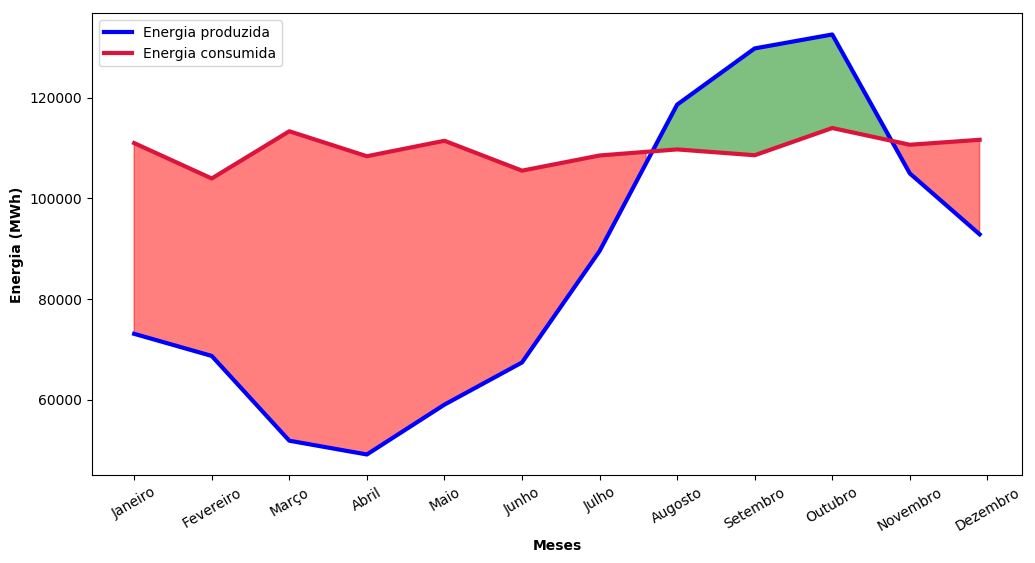

In [292]:
fig, ax = plt.subplots( figsize=(12,6))
x1 =np.arange(1,13,1)
plt.plot(xnew, ynew,color='b', linestyle='-',  label= 'Energia produzida',  linewidth=3);
plt.plot(xnew2,ynew2,color='crimson', linestyle='-', label= 'Energia consumida', linewidth=3);
ax.legend (loc = "upper left")
ticks = ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
labels = ax.set_xticklabels(['Janeiro','Fevereiro', 'Março','Abril','Maio', 'Junho', 'Julho', 'Augosto', 'Setembro', 'Outubro','Novembro', 'Dezembro'], rotation=30)
#plt.title('Average speed by month',fontweight='bold')
ax.set_xlabel("Meses", fontweight='bold')
ax.set_ylabel('Energia (MWh)',fontweight='bold')
ax.legend(loc ='upper left')



plt.style.use('seaborn-whitegrid')

plt.fill_between(xnew, ynew, ynew2, where=  (ynew-1) < (ynew2-1), color='red', alpha = 0.5)
plt.fill_between(xnew, ynew, ynew2,  where= (ynew-1) > (ynew2-1) , color='green', alpha = 0.5)

# Chart to show the variabilty of the hours

In [261]:
grouped_hora = df.groupby("hour")
horas = pd.DataFrame(
    {
        "Mean": grouped_hora["Velocidade"].mean(),
        "SD" : grouped_hora["Velocidade"].std(),
        "k (-)": grouped_hora["Velocidade"].apply (lambda x: stats.weibull_min.fit(x, loc=0)[0]),
        "C (m/s)": grouped_hora["Velocidade"].apply (lambda x: stats.weibull_min.fit(x, loc=0)[2]),
    }
)
k = horas["k (-)"]
c = horas["C (m/s)"]
h1 = 10
hr = 10
vh = 67
z0 = 0.02 #aeropuertos segun justus 
alpha = (z0/hr)**0.2
nnum = 1-(np.log(c)/np.log(vh))
nden = 1-((alpha*(np.log(h1/hr)))/np.log(vh))
n = alpha*(nnum/nden)
c2 =  c*(((112)/h1)**n)
knum = 1-((alpha*np.log(h1/hr))/(np.log(vh)))
kden = 1-((alpha*np.log((112/hr))/(np.log(vh))))
k2 = k*((knum)/(kden))
cfnum = (np.exp(-(2.5/c2)**k2)) - (np.exp(-(11/c2)**k2))
cfden = ((11/c2)**k2) - ((2.5/c2)**k2)
cfrest = np.exp(-(22/c2)**k)
CF = (cfnum/cfden)-cfrest
horas["CF"] = CF 
W = (CF* 3450*1)/1000
horas["W (MW / h)"] = W
horas['quinientos'] = horas['W (MW / h)']*100

In [103]:
horas

,Mean,SD,k (-),C (m/s),CF,W (MW / h),quinientos
hour,,,,,,,
0,3.925845,1.692942,2.574397,4.570021,0.249270,0.859981,85.998143
1,4.053906,1.845544,2.163075,4.271285,0.257842,0.889555,88.955468
2,4.192286,1.975216,2.065636,4.387454,0.284111,0.980184,98.018384
3,4.340081,2.090724,2.225994,4.933797,0.335356,1.156978,115.697795
4,4.359999,2.090020,2.026385,4.567880,0.311113,1.073340,107.333996
5,4.283663,2.066739,2.016163,4.495269,0.303321,1.046458,104.645762
6,4.214629,1.992966,2.325043,4.889899,0.319226,1.101329,110.132947
7,3.990419,1.895556,2.025282,4.134800,0.257598,0.888713,88.871294
8,3.819454,1.724299,2.406424,4.373039,0.242261,0.835799,83.579932


In [269]:
y3 = consumo.groupby("hora").porciento.mean()

y4 =  horas.quinientos

x2 =np.arange(1,25,1)

In [274]:
f3 = interpolate.interp1d(x2, y3)
xnew3 = np.arange(x2[0], x2[-1], 0.1)
ynew3 = f3(xnew3)

In [273]:
f4 = interpolate.interp1d(x2, y4)
xnew4 = np.arange(x2[0], x2[-1], 0.1)
ynew4 = f4(xnew4)

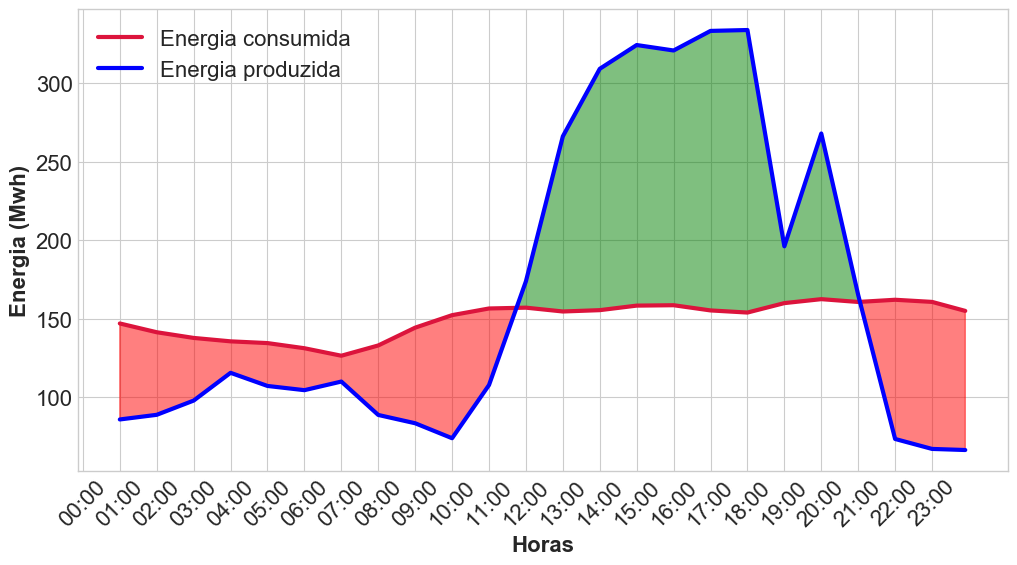

In [289]:
fig, ax = plt.subplots( figsize=(12,6))


plt.plot(xnew3, ynew3,color='crimson', linestyle='-',  label= 'Energia consumida',  linewidth=3);
plt.plot(xnew4,ynew4,color='b', linestyle='-', label= 'Energia produzida', linewidth=3);
ticks = ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
labels = ax.set_xticklabels(["00:00","01:00","02:00","03:00","04:00","05:00","06:00","07:00","08:00","09:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00"], rotation=45)
#plt.title('Average speed by hour',fontweight='bold')
ax.set_xlabel("Horas", fontweight='bold')
ax.set_ylabel('Energia (Mwh)',fontweight='bold')
ax.legend(loc ='upper left')

plt.fill_between(xnew3, ynew3, ynew4, where=  (ynew3-1) < (ynew4-1) , color='green', alpha = 0.5)
plt.fill_between (xnew3, ynew3, ynew4, where= (ynew3-1) > (ynew4-1) , color='red', alpha = 0.5)